In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zTminpT15/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTminpT15/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTminpT15/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_8_006zT06zTminpT15/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTminpT15/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTminpT15/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
print(dPhi_Bins[ZYAM_Min_i:ZYAM_Max_i+1])
print(delta_phi_centers[ZYAM_Min_i:ZYAM_Max_i])

[0.39269908169872414, 0.5890486225480862, 0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345, 1.5707963267948966]
[0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154]


In [3]:
N_Bins = 9
a = np.geomspace(0.06,0.6,N_Bins+1)
for i in a:
    if (i == a[0]):
        print("[%1.3f,"%(i)),
        continue
    if (i == a[N_Bins]):
        print("%1.3f]"%(i))
        continue
    print("%1.3f,"%(i)),

[0.060, 0.077, 0.100, 0.129, 0.167, 0.216, 0.278, 0.360, 0.465, 0.600]


**root to numpy**

In [4]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [5]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)
#Plot_UB()

**Pedestal Subtraction**

In [6]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for izt in range(NzT):
        fig = plt.figure(figsize=(8,7))
        #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
        GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
        plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

In [7]:
Ped_Sub_After_Cs(Corrs)

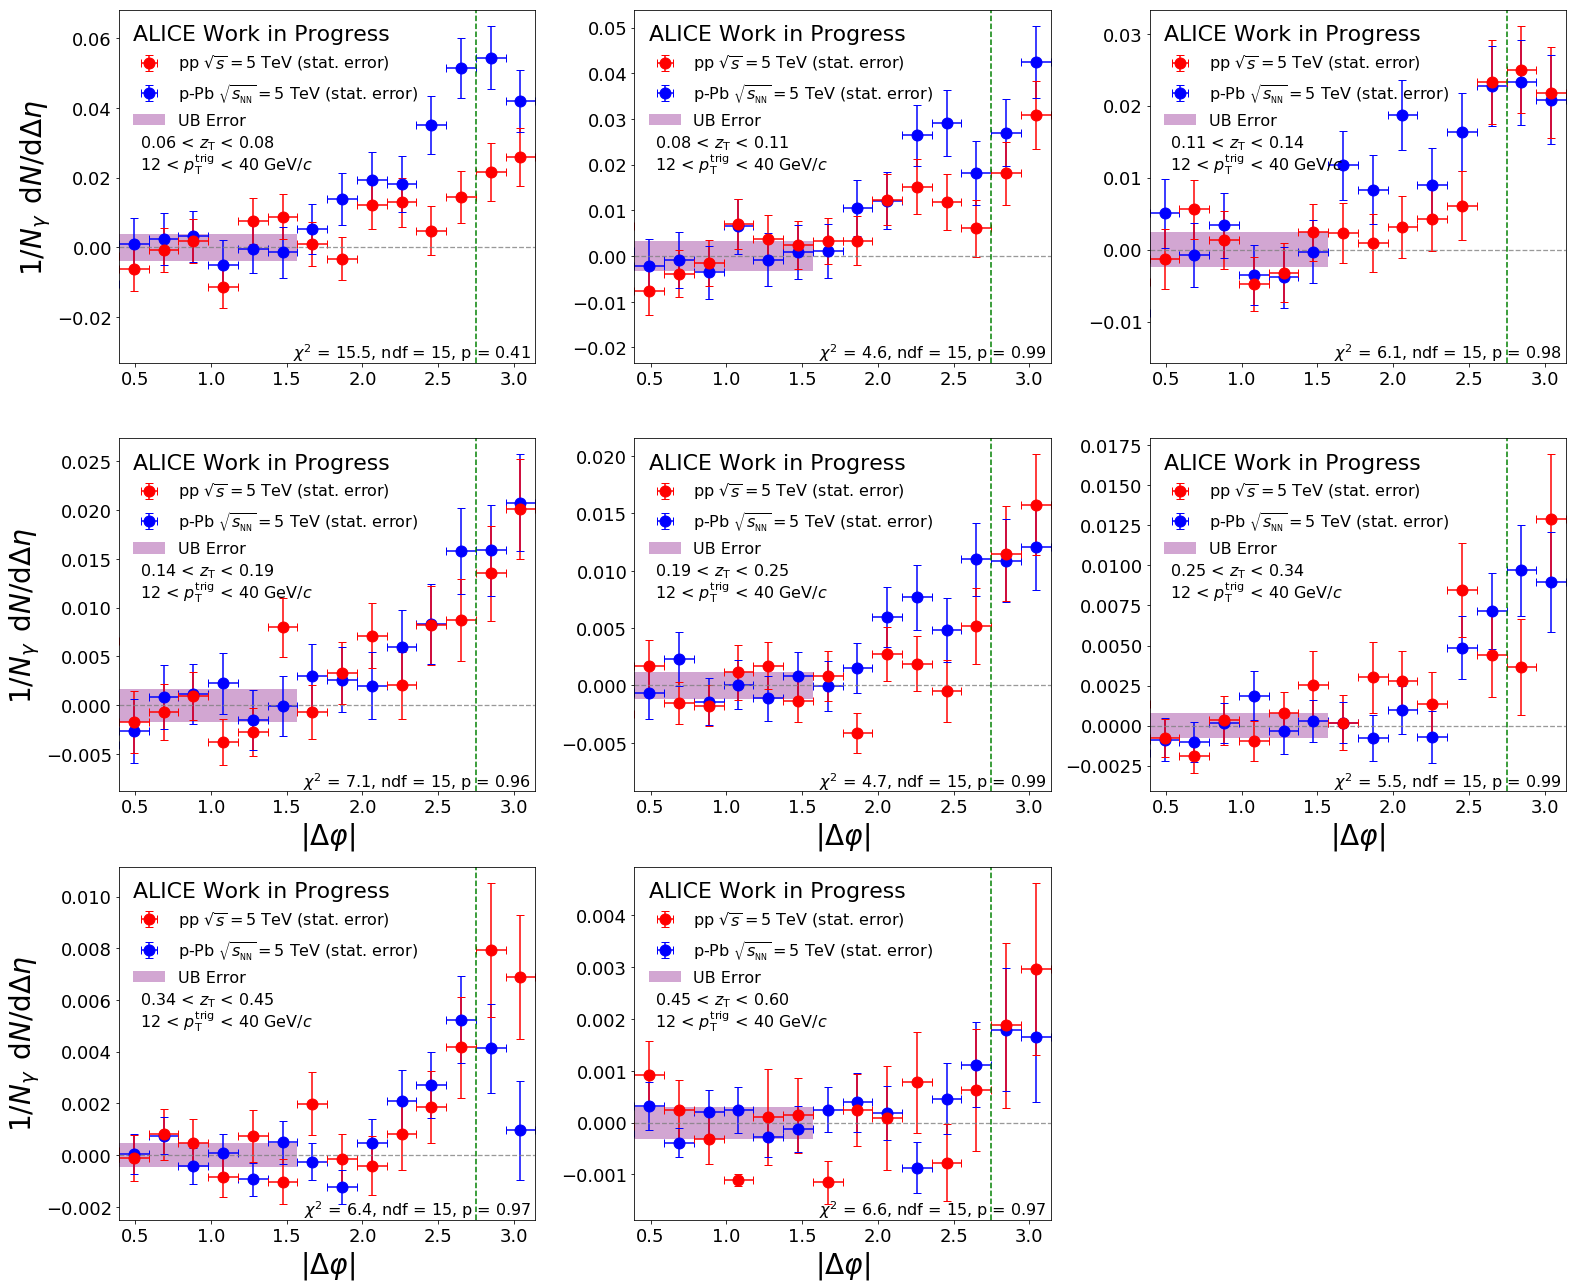

In [8]:
Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [9]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][3][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][3][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]))

Number of Away side bins = 2
[-0.00317564  0.00662623 -0.00173557 -0.00071397  0.00095477 -0.00375548
 -0.00273566  0.00798591 -0.00071095  0.00329592  0.0071383   0.00204466
  0.00818032  0.00873678  0.01352349  0.02014398]
pp
0.085733 +\- 0.017997 +\- 0.005698
0.22018616944247166
non-dphi rate 0.007
p-Pb
0.093240 +\- 0.017339 +\- 0.006558
0.19881349991853148
non-dphi rate 0.008


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [10]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [11]:
Frags = Get_Fragmentation(Corrs)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

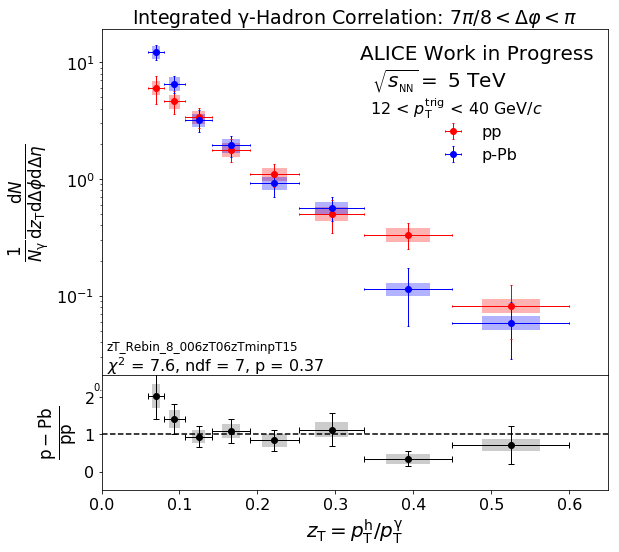

pp_purity_FF_Errors:
0.7427, 0.5678, 0.4185, 0.2194, 0.1352, 0.0618, 0.0411, 0.0101, 

p-Pb_FF_Errors:
1.7870, 1.1135, 0.6771, 0.3862, 0.2203, 0.1323, 0.0597, 0.0300, 

pp_FF:
6.0464, 4.6226, 3.4069, 1.7861, 1.1009, 0.5031, 0.3344, 0.0823, 

pp_FF_Errors:
1.6294, 1.0337, 0.6816, 0.3933, 0.2529, 0.1559, 0.0814, 0.0401, 

p-Pb_FF:
12.2695, 6.5580, 3.2089, 1.9425, 0.9264, 0.5660, 0.1145, 0.0586, 

p-Pb_purity_FF_Errors:
1.5072, 0.8056, 0.3942, 0.2386, 0.1138, 0.0695, 0.0141, 0.0072, 

zT Centers:
0.07, 0.09, 0.12, 0.17, 0.22, 0.30, 0.39, 0.53, 
zT Widths:
0.0100, 0.0135, 0.0175, 0.0240, 0.0315, 0.0420, 0.0565, 0.0750,


In [12]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)
print("zT Centers:")
for izt in zT_centers:
    print("%1.2f,"%(izt)),
print("")
    
print("zT Widths:")
for izt in zT_widths:
    print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [13]:
reload(functions_fragmentation)
from functions_fragmentation import *

zT_Rebin_8_006zT06zTminpT15 Intg. 7\pi/8  & $1.99 \pm 0.11$ & 1.23  & $2.48 \pm 0.11$ & 0.91  & $7.58/7\ 0.37 $\\


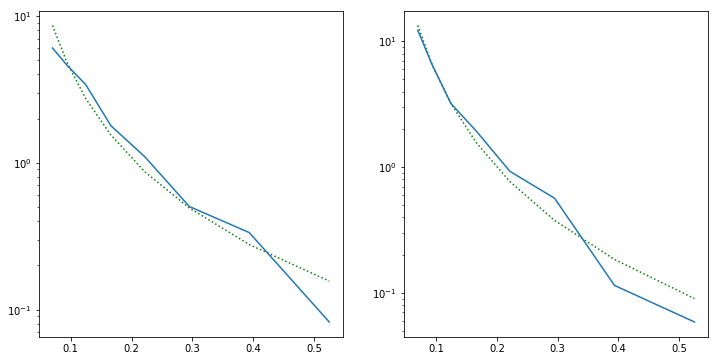

In [14]:
LaTeX_Table(Combined_Frags)

[0.24601864 0.20714043 0.17109598 0.14008995 0.11815771 0.11082409
 0.12077832 0.14449053 0.17650017 0.21310043 0.25230134 0.29306112
 0.33481094 0.37722221 0.42009465 0.46330025 0.5067538  0.55039658
 0.5941869  0.63809437]
0.857556856327


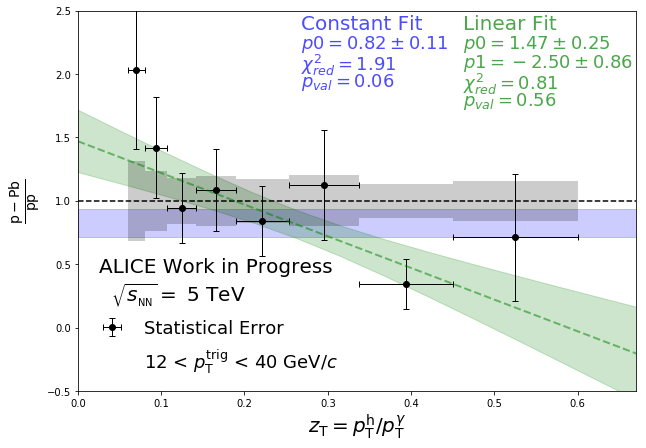

                Central Values:
[2.02924522 1.41868726 0.94187961 1.0875566  0.84149082 1.12493107
 0.34249654 0.71217085]

                Satistical Uncertainty Absolute:
[0.62161497 0.39835007 0.27386892 0.32263748 0.27823349 0.43659626
 0.1969916  0.5032991 ]

               Relative Satistical Uncertainty:
[0.30632816 0.2807878  0.2907685  0.2966627  0.33064352 0.38810934
 0.57516376 0.70671118]

                Ratio Uncertainty from Purity:
[0.27789778 0.21321508 0.16874994 0.18148754 0.16054596 0.18489324
 0.12984569 0.15080839]

                Ratio Uncertainty from Single Track Efficiency:
[0.14348931 0.10031634 0.06660095 0.07690186 0.05950239 0.07954464
 0.02421816 0.05035808]

                Full Systematic Uncertainty:
[0.31275606 0.23563539 0.18141727 0.19710815 0.17121782 0.20127807
 0.13208491 0.15899405]

****************************************
Minimizer is Linear
Chi2                      =      13.3434
NDf                       =            7
p0                  

In [15]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

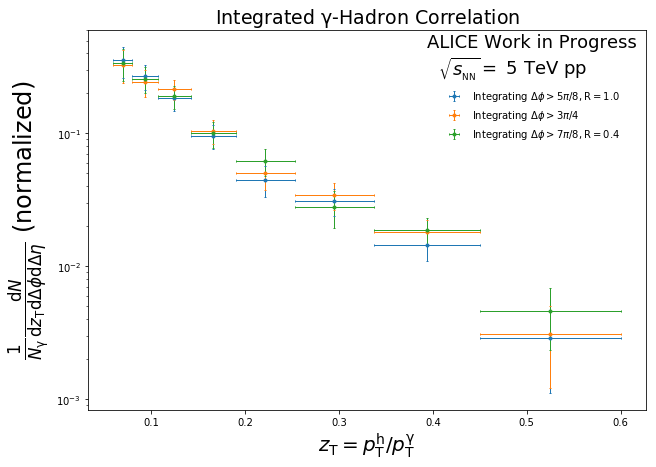

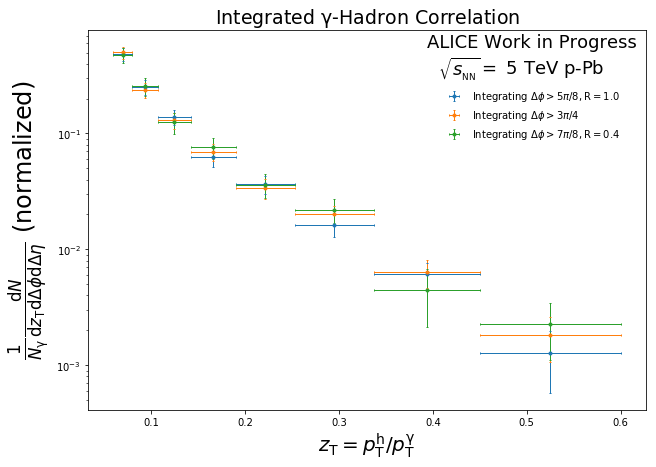

In [16]:
ranges = (1.9,2.3,2.7)
strings = ("5\pi/8, \mathrm{R} = 1.0","3\pi/4","7\pi/8, \mathrm{R} = 0.4")

Compare_FF_Integration(ranges,strings)

In [17]:
reload(functions_fragmentation)
from functions_fragmentation import *

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zT_Small_Zyam_Avg
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT_Small_Zyam_Avg.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT_Small_Zyam_Avg.npy


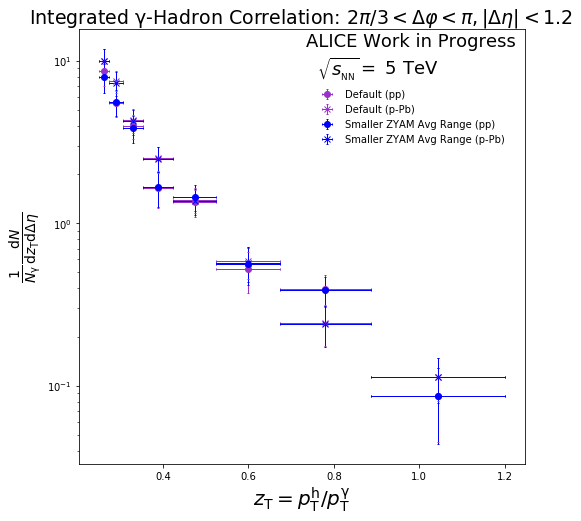

                Central Values:


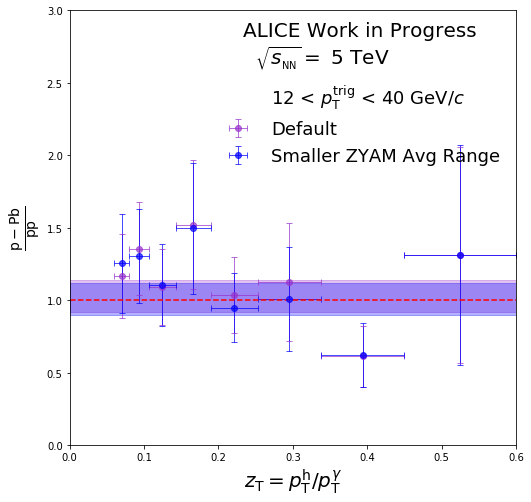

                Central Values:
[1.25447735 1.30212027 1.10274259 1.4968685  0.9471799  1.00968907
 0.62082376 1.30841238]

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      5.93842
NDf                       =            7
p0                        =      1.00803   +/-   0.109698    


In [18]:
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zT_Small_Zyam_Avg"]
string_descriptions = ["Default","Smaller ZYAM Avg Range","9 zT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

zT_Rebin_7_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_9_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy


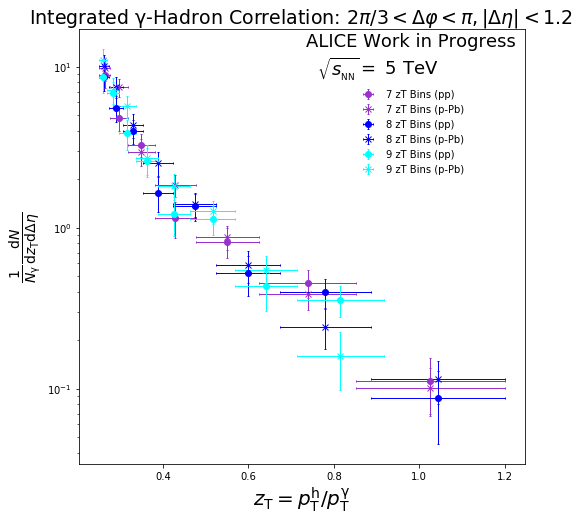

                Central Values:


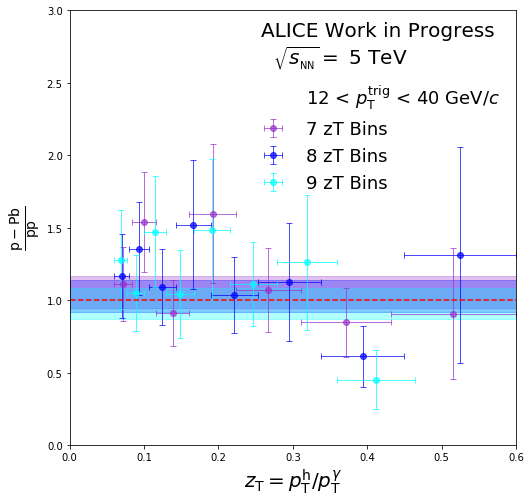

                Central Values:
[1.27896035 1.04748336 1.47293288 1.04031211 1.48675181 1.11300058
 1.26025088 0.45009227 1.04742904]

****************************************
Minimizer is Linear
Chi2                      =      4.59919
NDf                       =            6
p0                        =      1.05873   +/-   0.110663    

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      11.0183
NDf                       =            8
p0                        =     0.978675   +/-   0.106292    


In [19]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

## Compare Different pT Binning

In [20]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

[0.24601864 0.20714043 0.17109598 0.14008995 0.11815771 0.11082409
 0.12077832 0.14449053 0.17650017 0.21310043 0.25230134 0.29306112
 0.33481094 0.37722221 0.42009465 0.46330025 0.5067538  0.55039658
 0.5941869  0.63809437]
0.857556856327


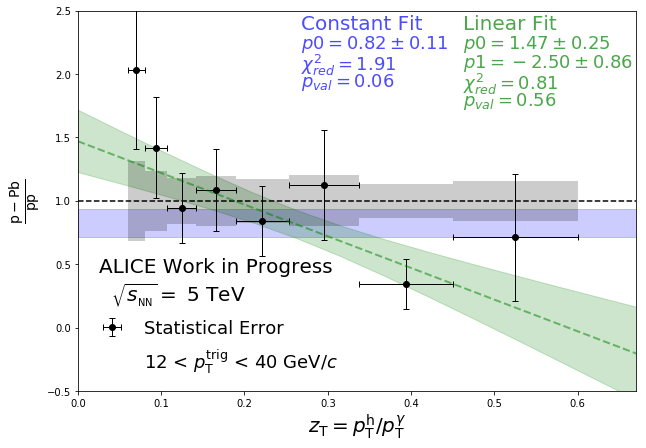

                Central Values:
[2.02924522 1.41868726 0.94187961 1.0875566  0.84149082 1.12493107
 0.34249654 0.71217085]

                Satistical Uncertainty Absolute:
[0.62161497 0.39835007 0.27386892 0.32263748 0.27823349 0.43659626
 0.1969916  0.5032991 ]

               Relative Satistical Uncertainty:
[0.30632816 0.2807878  0.2907685  0.2966627  0.33064352 0.38810934
 0.57516376 0.70671118]

                Ratio Uncertainty from Purity:
[0.27789778 0.21321508 0.16874994 0.18148754 0.16054596 0.18489324
 0.12984569 0.15080839]

                Ratio Uncertainty from Single Track Efficiency:
[0.14348931 0.10031634 0.06660095 0.07690186 0.05950239 0.07954464
 0.02421816 0.05035808]

                Full Systematic Uncertainty:
[0.31275606 0.23563539 0.18141727 0.19710815 0.17121782 0.20127807
 0.13208491 0.15899405]

****************************************
Minimizer is Linear
Chi2                      =      13.3434
NDf                       =            7
p0                  

In [21]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zTpT2
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpT2.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpT2.npy


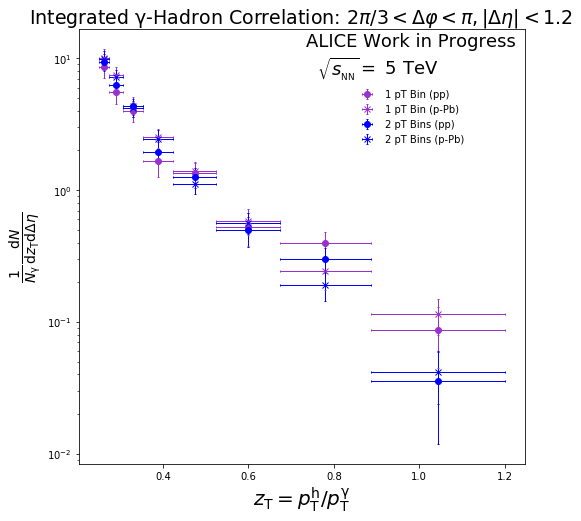

                Central Values:


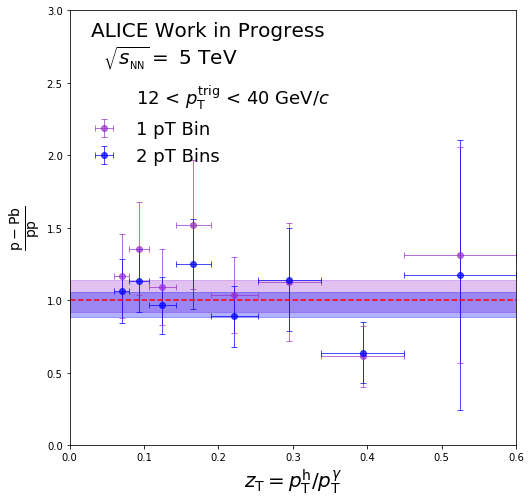

                Central Values:
[1.06243623 1.13544309 0.96307152 1.25018322 0.88824074 1.14142689
 0.6374398  1.17328836]

****************************************
Minimizer is Linear
Chi2                      =      6.60779
NDf                       =            7
p0                        =      1.02796   +/-   0.10807     

****************************************
Minimizer is Linear
Chi2                      =      4.50402
NDf                       =            7
p0                        =     0.972113   +/-   0.0870242   


In [22]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

pT_Rebin_1_pDevNONE
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevNONE.npy
pT_Rebin_1_pDevPlus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevPlus.npy
pT_Rebin_1_pDevMinus
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_pDevMinus.npy
pT_Rebin_1_90p
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_1_90p.npy


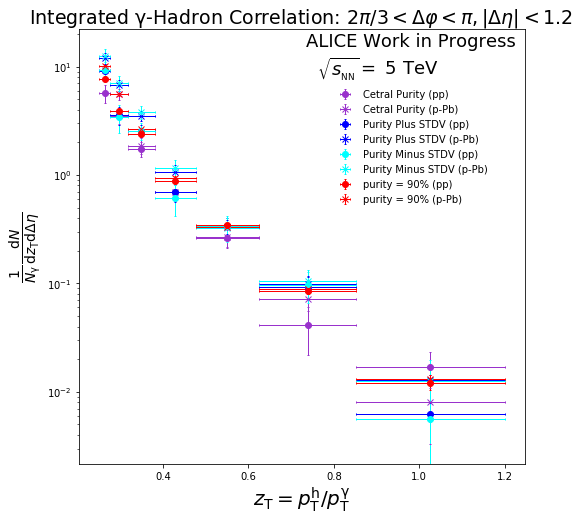

                Central Values:


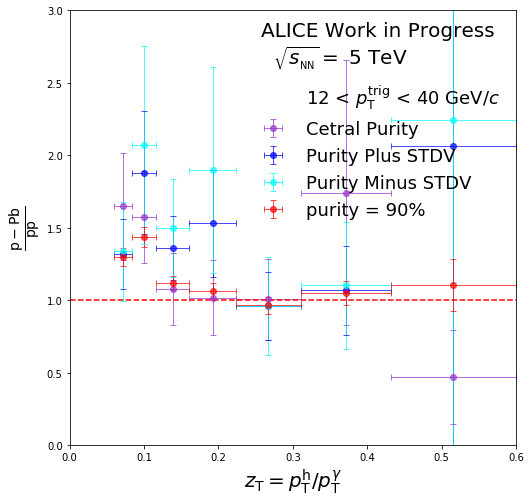

                Central Values:
[1.29867451 1.43467071 1.11537355 1.0607137  0.96336133 1.04910989
 1.10430099]

****************************************
Minimizer is Linear
Chi2                      =      8.87214
NDf                       =            6
p0                        =      1.10897   +/-   0.117923    

****************************************
Minimizer is Linear
Chi2                      =      5.03376
NDf                       =            6
p0                        =      1.27169   +/-   0.112121    

****************************************
Minimizer is Linear
Chi2                      =       3.5561
NDf                       =            6
p0                        =      1.32588   +/-   0.168016    

****************************************
Minimizer is Linear
Chi2                      =      37.1655
NDf                       =            6
p0                        =      1.13933   +/-   0.0242047   


In [23]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)